# 순환 신경망(RNN, Recurrent Neural Network) 

In [1]:
# 경고(worning) 무시
import warnings
warnings.filterwarnings('ignore')

## IMDB 데이타 셋을 RNN으로 실행하기
### IMDB 데이타 셋
- 영어 데이터로 영화 사이트 IMDB의 리뷰 데이터
- 영화 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터
- 스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개
- 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50대 비율로 분할하여 88.89%의 정확도를 얻었다고 소개

### 1. 데이타 불러오기

In [3]:
from tensorflow.keras.datasets import imdb

# 1 ~ 10,000 빈도 순위(빈도가 높은 순위)에 해당하는 단어만 사용
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

17464789/17464789 [==============================] - 1s 0us/step


### 2. 데이터를 동일한 길이로 맞추기

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 각 데이터의 최대 길이를 500으로 동일하게 맞춰주기
max_len = 500

pad_x_train = pad_sequences(X_train, maxlen=max_len)
pad_x_test = pad_sequences(X_test, maxlen=max_len)

참고) pip install numpy==1.19.5

### 3. SimpleRNN 모델 정의
#### 1) Embedding 층 
- 임베딩(Embedding) : 데이타의 표현을 학습하여 데이타 사전을 구축하는 것
- 유사한 의미의 단어를 비슷한 공간에 매핑할 수 있지만, 
    - 시퀀스 데이타의 중요한 특성인 순서와 맥락까지 고려하지 못함 
    - -> 순환신경망을 이용하여 해결
    
#### 2)  SimpleRNN 층을 여러개 쌓아 구성
- return_sequences, dropout, recurrent_dropout 인자
- 1) return_sequences 
    - SimpleRNN 층을 여러 개 사용하기 위해서는  return_sequences 인자를 사용
    - return_sequences = True : 이전 상태의 연결을 위해 전체 상태 시퀀스를 반환하는 것
- 2) dropout, recurrent_dropout 인자
    - 케라스가 제공하는 모든 순환층에는 드롭아웃 사용을 위한 dropout, recurrent_dropout 인자가 존재
    - 이를 사용하면 별도의 dropout 층을 추가하지 않아도 드룹아웃 방식을 적용할 수 있다.

In [5]:
# 모델 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

# 빈도가 높은 10000개 단어 사용
num_words = 10000

# RNN 모델 구성
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32)) # 입력층

# 새로운 인자 3개 사용 
# - return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True))  # RNN 층
model.add(SimpleRNN(32)) # RNN 층
model.add(Dense(1, activation = 'sigmoid'))        # 출력층

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일 설정

In [6]:
# 컴파일 설정
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

### 5. 모델 학습

In [7]:
# 모델 학습
history = model.fit(pad_x_train, y_train, 
                    batch_size = 32, 
                    epochs = 15, 
                    validation_split = 0.2) # 검증 데이타를 훈련데이타의 20% 할당

Epoch 1/15
625/625 [==============================] - 84s 131ms/step - loss: 0.5410 - acc: 0.7041 - val_loss: 0.4315 - val_acc: 0.8000
Epoch 2/15
625/625 [==============================] - 77s 123ms/step - loss: 0.3395 - acc: 0.8604 - val_loss: 0.3851 - val_acc: 0.8424
Epoch 3/15
625/625 [==============================] - 75s 119ms/step - loss: 0.2827 - acc: 0.8817 - val_loss: 0.4046 - val_acc: 0.8264
Epoch 4/15
625/625 [==============================] - 74s 119ms/step - loss: 0.1797 - acc: 0.9342 - val_loss: 0.5004 - val_acc: 0.8102
Epoch 5/15
625/625 [==============================] - 74s 119ms/step - loss: 0.2161 - acc: 0.9128 - val_loss: 0.5370 - val_acc: 0.8258
Epoch 6/15
625/625 [==============================] - 76s 122ms/step - loss: 0.0728 - acc: 0.9758 - val_loss: 0.6387 - val_acc: 0.8158
Epoch 7/15
625/625 [==============================] - 80s 129ms/step - loss: 0.0466 - acc: 0.9844 - val_loss: 0.7853 - val_acc: 0.7846
Epoch 8/15
625/625 [==============================] - 8

### 6. 모델 평가

In [8]:
# 모델 평가 - test dataset
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 24s 31ms/step - loss: 0.9581 - acc: 0.7772


[0.9581300020217896, 0.777239978313446]

In [9]:
# 모델 평가 - train dataset
model.evaluate(pad_x_train, y_train)

782/782 [==============================] - 24s 31ms/step - loss: 0.1937 - acc: 0.9546


[0.19372475147247314, 0.9546399712562561]

### 7. 학습 과정 그리기

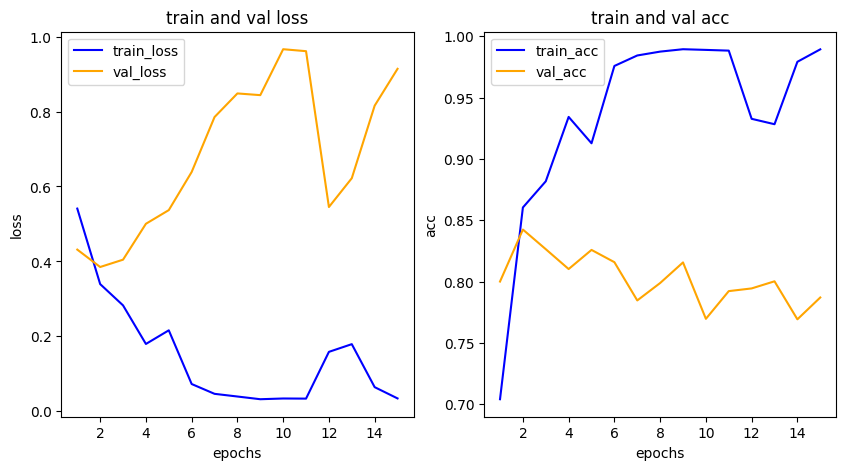

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

- 결과 해석)
    - SimpleRNN층은 영화 리뷰와 같이 긴 문장의 데이타를 처리하기에는 문제가 있음
    - 앞부분에 존재하는 몇 개의 시점은 기억할 수 있지만, 
        - 시점이 흐를수록 지속해서 기억하지 못하기 때문에 성능이 낮음
    - 대부분 실제 환경에서는 SimpleRNN층을 사용하지 않음